In [1]:
# Data Pre-processing Step
# Importing libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm             import SVC
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors       import ListedColormap
from sklearn.metrics         import confusion_matrix

# Importing datasets
data_set = pd.read_csv('user_data.csv')

# Extracting Independent and dependent Variable
x = data_set.iloc[:, [2, 3]].values
y = data_set.iloc[:, 4].values

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature Scaling
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)


# from sklearn.svm import SVC
# classifier = SVC(kernel='linear', random_state=0)

In [2]:
# Fitting the SVM classifier to the training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)


SVC(kernel='linear', random_state=0)

In [3]:
# Predicting the test set result
y_pred = classifier.predict(x_test)


In [4]:
cm = confusion_matrix(y_test, y_pred)

In [5]:
cm

array([[66,  2],
       [ 8, 24]])

/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_12225/2303602130.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == label, 0],


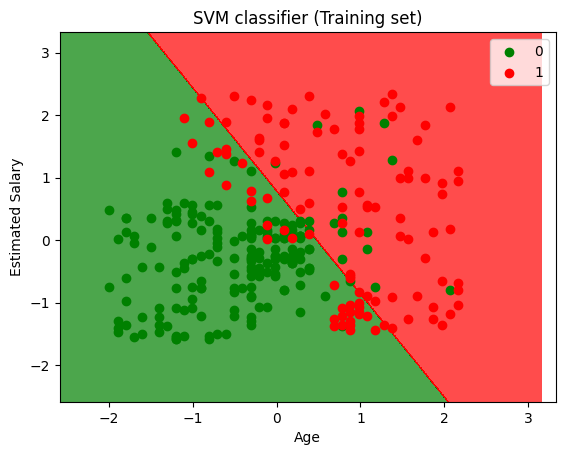

/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_12225/2303602130.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == label, 0],


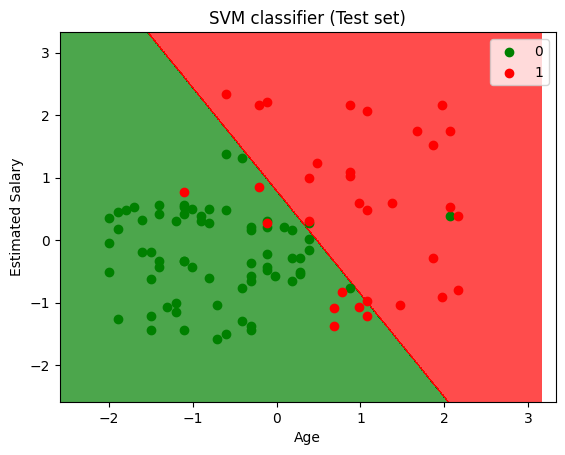

In [11]:
def visualize_result(x_set, y_set, title, x_label, y_label,  legend_labels):

    x1, x2 = np.meshgrid(
                    np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,1].max()+1, step=0.01))

    colors = ListedColormap(['green', 'red', 'grey'])
    colors = ListedColormap(['green', 'red'])

    # scaling graph
    plt.xlim(x1.min(), x1.max())
    plt.xlim(x2.min(), x2.max())


    # background color -- tour
    plt.contourf(x1, x2,
                 classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                 alpha=0.7,
                 cmap = colors)


    # plotting points -- independent of x1, x2 -- plotting points (x,y) == x_set[y_set == label, 0]
    for i, label in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == label, 0],
                    x_set[y_set == label, 1],
                    c = colors(i),
                    label = str(label))

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(legend_labels)
    plt.show()

# Visualizing the training set result
visualize_result(x_train, y_train,  'SVM classifier (Training set)', 'Age', 'Estimated Salary',legend_labels=['0', '1', '2'])

# Visualizing the test set result
visualize_result(x_test, y_test, 'SVM classifier (Test set)', 'Age', 'Estimated Salary',legend_labels=['0', '1', '2'])
